<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Predict the probabilities of default  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2> 

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         What is Credit Risk?

In simple words, it is the risk of borrower not repaying loan, 

credit card or any other type of loan. Sometimes customers pay some 

installments of loan but don't repay the full amount which includes 

principal amount plus interest.
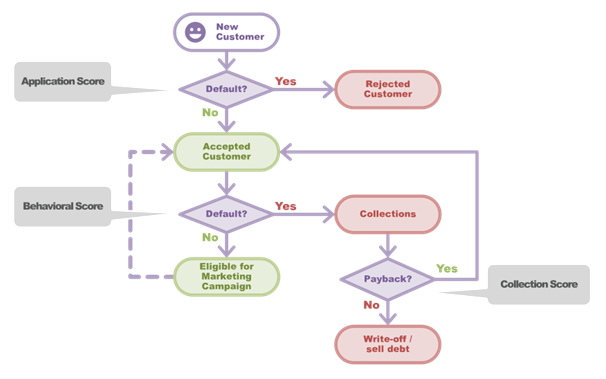
        </p>
    </div>


 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2> 

In [323]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier



In [324]:
data=pd.read_csv('/kaggle/input/newdata/loan_data.csv',low_memory=False)

In [325]:
data.info()

<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2> 

In [326]:
data.isnull().sum().head(40)

In [327]:
data.shape

In [328]:
data.describe().T



<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
              We're going to try to learn differences in the features between completed loans that have been Default. We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So we only keep the loans with status "Default."
        </p>
    </div>


In [329]:

nulls = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         Drop features missing more than 20% data
        </p>
    </div> 



In [330]:
# Drop unneccesary columns
#data.drop('id','emp_title','url','desc',,'delinq_2yrs','earliest_cr_line','mths_since_last_delinq', 'mths_since_last_record',)

data = data.drop(['id','emp_title','emp_length','url','title','earliest_cr_line','mths_since_last_record','next_pymnt_d',
 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp','last_pymnt_d','mths_since_last_major_derog','annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m','mths_since_last_delinq','desc',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis=1)

In [331]:
data.shape

In [332]:
data.isnull().sum()

In [333]:
data['annual_inc']=data['annual_inc'].fillna(data['annual_inc'].mean())
data['delinq_2yrs']=data['delinq_2yrs'].fillna(data['delinq_2yrs'].mean())
data['inq_last_6mths']=data['inq_last_6mths'].fillna(data['inq_last_6mths'].mean())
data['open_acc']=data['open_acc'].fillna(data['open_acc'].mean())
data['pub_rec']=data['pub_rec'].fillna(data['pub_rec'].mean())
data['revol_util']=data['revol_util'].fillna(data['revol_util'].mean())
data['total_acc']=data['total_acc'].fillna(data['total_acc'].mean())
data['collections_12_mths_ex_med']=data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mean()) 



In [334]:
data.duplicated().any()

In [335]:
data.isnull().sum()

<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">step 4. Pre-processing and Exploratory Analysis¶

 </h2> 

In [336]:
data.shape

In [337]:
data['loan_status'].value_counts()


In [338]:
target = [1 if i=='Default' else 0 for i in data['loan_status']]
data['target'] = target
data['target'].value_counts()

In [339]:
ax = sns.countplot(x = data.target ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Defaulter loan status')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

we can see we have max customer who is not defaulter

In [340]:
data.columns

Since no customer has taken loan again, we can drop member id .


In [341]:
data.drop(['member_id'], axis=1, inplace=True)


**loan_amnt**

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [342]:
data['loan_amnt'].describe()


In [343]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plot_var('loan_amnt', 'Loan Amount', continuous=True)
sns.boxplot(x='target', y='loan_amnt', data=data)
plt.ylabel('Loan Amount')



In [344]:
sns.distplot(data['loan_amnt'],color='darkblue')
plt.xlabel('Loan Amount',fontsize=12)
plt.grid()

**term**

Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

In [345]:
data['term'].value_counts(dropna=False)


In [346]:
g  = sns.factorplot(x="term",y="target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [347]:
data['term'].value_counts(normalize=True)


In [348]:
data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Default']


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interfaces 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          About 60% of the not deault loans have three-year periods, and the rest have five-year periods.
        </p>
    </div>


 **int_rate**
 
Data Dictionary: "Interest Rate on the loan."

In [349]:
data['int_rate'].describe()


In [350]:
sns.distplot(data['int_rate'],color='darkblue')
plt.xlabel('Loan Interest Rate',fontsize=12)
plt.grid()

In [351]:
f, ax = plt.subplots(figsize=(7,4))
sns.barplot(y='int_rate', x="target",  data=data);

**installment**

Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

In [352]:
sns.distplot(data['installment'],color='darkblue')
plt.xlabel('Loan Installment',fontsize=12)
plt.grid()

In [353]:
#f, ax = plt.subplots(figsize=(7,4))
sns.barplot(y='installment', x="target",  data=data);

In [354]:
data.groupby('target')['installment'].describe()


**** grade, sub_grade**
**

Data Dictionary for grade: "LendingClub assigned loan grade."

Data Dictionary for sub_grade: "LendingClub assigned loan subgrade."

In [355]:
print(sorted(data['grade'].unique()))


In [356]:
data['grade'].value_counts()

In [357]:
print(sorted(data['sub_grade'].unique()))


In [358]:
data.drop('grade', axis=1, inplace=True)


In [359]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='sub_grade', y="target",  data=data);

**home_ownership**

Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [360]:
data['home_ownership'].value_counts(dropna=False)


In [361]:
data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)


In [362]:
data['home_ownership'].value_counts()


In [363]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='home_ownership', y="target",  data=data);

In [364]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Default']

**annual_inc**

Data Dictionary: "The self-reported annual income provided by the borrower during registration."

In [365]:
data['annual_inc'].describe()


In [366]:
data['annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))


In [367]:
data['annual_inc'].describe()


In [368]:
sns.boxplot(x='target', y='annual_inc', data=data)
plt.ylabel('Anual Income')

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan status:
        </p>
    </div>



**purpose**

Data Dictionary: "A category provided by the borrower for the loan request."

In [369]:
data['purpose'].value_counts()


In [370]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()

**zip_code, addr_stat**

Data Dictionary for zip_code: "The first 3 numbers of the zip code provided by the borrower in the loan application."

Data Dictionary for addr_state: "The state provided by the borrower in the loan application.

In [371]:
data['zip_code'].sample(5)
data.drop(labels='zip_code', axis=1, inplace=True)


In [372]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()

Data Dictionary: "The number of open credit lines in the borrower's credit file."


In [373]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(data['open_acc'], order=sorted(data['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [374]:
data.groupby('target')['open_acc'].describe()


In [375]:
data['application_type'].value_counts()


In [376]:
data.drop(labels='application_type',axis=1,inplace=True)

In [377]:
data['policy_code'].head()

In [378]:
data.drop(['policy_code','loan_status','collections_12_mths_ex_med','last_credit_pull_d','issue_d'],axis=1,inplace=True)

In [379]:
data.shape

In [380]:
data.isnull().sum()

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Handling Categorical Data </h2> 

There are no categorical variables with missing values, and therefore we don't need any NaN dummy variables.

Create dummy variables for the categorical variables:

In [381]:
categorical = []
for column in data:
    if data[column].dtype == 'object':
        categorical.append(column)
categorical

In [382]:
data = pd.get_dummies(data, columns=['sub_grade', 'home_ownership', 'verification_status','pymnt_plan','purpose', 'addr_state', 'initial_list_status'], drop_first=True)

In [383]:
data['term']=data.term.str.replace(' months','').astype(int)

In [384]:
data.head()

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 5 : Train/test split </h2>  

In [385]:
data.shape

In [386]:
y_train = data['target']
y_test = data['target']

In [387]:
X_train = data.drop('target', axis=1)
X_test = data.drop('target', axis=1)
X_train.head()

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 6 : Model Building</h2>




**Building our credit scoring model**

<h2 style="color:#DC7633;">Randome Forest Classifier
</h2>


In [388]:
parameters = {'n_estimators': 50, 'random_state' : 20}
    
rf_model = RandomForestClassifier(**parameters)
rf_model.fit(X_train, y_train)

In [389]:
# Accuracy of model
rf_model.score(X_test, y_test)

In [390]:
#probability of defaulter
defaultProba = rf_model.predict_proba(X_test)
ypred=rf_model.predict(X_test)
print(defaultProba)

In [391]:
#result_df=pd.DataFrame(result_df, columns=['y_test','default_proba','ypred'])
result_df=pd.DataFrame({'y_test':y_test,'default_proba':default_proba,'y_pred':ypred})
result_df.head()


In [392]:
#result_df['default_proba']=defaultProba
#result_df['ypred']=ypred
#result_df['y_test']=y_test
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,ypred))

In [393]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2 style="color:#DC7633;">Logistic Regresion</h2>


In [394]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [395]:
model.fit(X_train, y_train)


In [396]:
model.predict(X_test)


In [397]:
model.predict_proba(X_test)

In [398]:
model.score(X_test,y_test)


<h2 style="color:#DC7633;">xgboost</h2>


In [399]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [400]:
model = XGBClassifier()
model.fit(X_train, y_train)

In [401]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [402]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         So here we can see all the model are performed very well but we got highest accuracy almost 100% from Random Forest Algorithm. we can performed others algorithms also but we got the higest accuracy with this model so stopped here.  
</p>
 </div>